Estos datos fueron previamente utilizados en el experimento de psicología cognitiv y representan diferentes condiciones de un experimento.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

## Obtener datos

In [2]:
df = pd.read_csv('globos.csv')
df.head()

,YELLOW,SMALL,STRETCH,ADULT,T
0,YELLOW,SMALL,STRETCH,CHILD,T
1,YELLOW,SMALL,DIP,ADULT,T
2,YELLOW,SMALL,DIP,CHILD,F
3,YELLOW,SMALL,DIP,CHILD,F
4,YELLOW,LARGE,STRETCH,ADULT,T


## Procesar datos

Ya que el modelo solo acepta valores numéricos y el dataset contiene valores nominales es necesario antes del entrenamiento encodear los valores para que tengan un valor numérico.

In [3]:
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,YELLOW,SMALL,STRETCH,ADULT,T
0,1,1,1,1,1
1,1,1,0,0,1
2,1,1,0,1,0
3,1,1,0,1,0
4,1,0,1,0,1


### Obtener subconjunto de atributos

In [4]:
data = df.values[:,0:4]
data

array([[1, 1, 1, 1],
       [1, 1, 0, 0],
       [1, 1, 0, 1],
       [1, 1, 0, 1],
       [1, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 1, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

### Obtener subconjunto de clases

In [5]:
target = df.values[:,4]
target

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0])

## Crear conjuntos de entrenamiento y prueba

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data,target,test_size=0.3)


## Entrenar modelo

In [11]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

## Obtener prediciones

In [12]:
y_pred = gnb.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 1])

## Comprobar las predicciones

In [13]:
metrics.accuracy_score(y_test, y_pred)

1.0

In [14]:
metrics.confusion_matrix(y_test, y_pred)

array([[2, 0],
       [0, 4]])

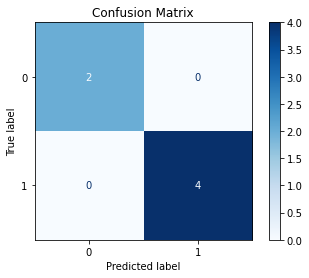

In [16]:
disp = metrics.plot_confusion_matrix(gnb, x_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
plt.show()

## Conclusión

Es un modelo no *estable*, ya que el conjunto de entrenamiento no es el correcto para trabajar con este algoritmo